In [273]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
# import lightgbm as lgb


import plotly.express as px
import plotly.graph_objects as go

sns.set()

In [274]:

data = pd.read_csv("heart.csv")

In [240]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


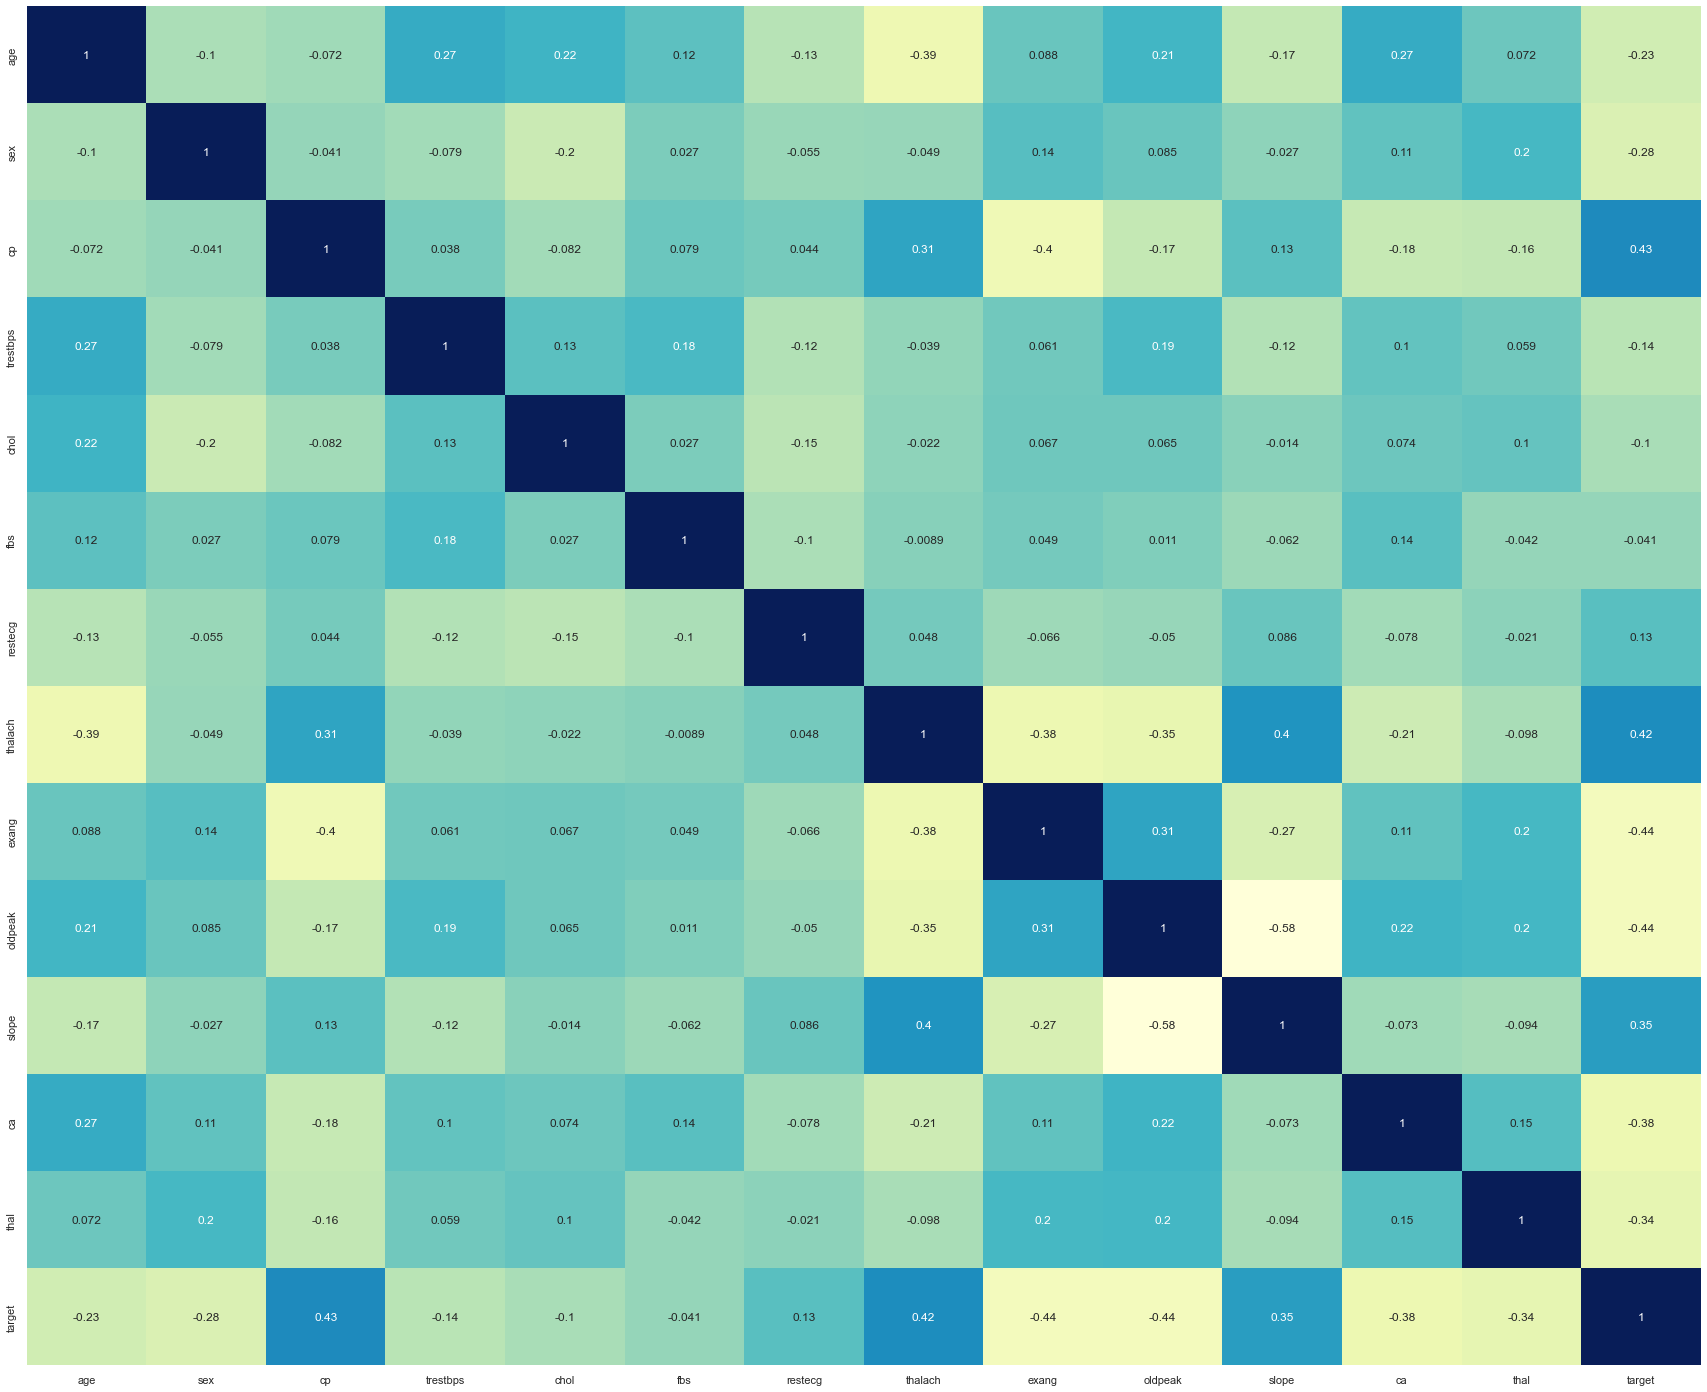

In [241]:
plt.figure(figsize=(30,25))

sns.heatmap(data.corr(),annot = True, cmap = "YlGnBu", cbar = False)
plt.show()

<AxesSubplot:>

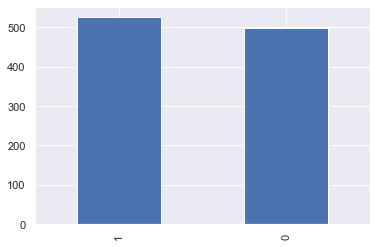

In [242]:
data["target"].value_counts().plot(kind="bar")

In [276]:

X=data.drop(columns=["target"])
scaler = StandardScaler()
X = scaler.fit_transform(X)
y=data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)


In [277]:
lr = LogisticRegression()

In [245]:
lr.fit(X_train,y_train)

LogisticRegression()

In [246]:

y_pred=lr.predict(X_test)

In [247]:

print(lr.score(X_train,y_train))

print(lr.score(X_test,y_test))
print("accuracy")
print(classification_report(y_test, y_pred))

0.8597560975609756
0.8146341463414634
accuracy
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       103
           1       0.79      0.86      0.82       102

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



## taking 99.7 and 95% 

In [248]:
dataset=data.copy()

def outliers(x,df):
    print(x)
    df=data[(data[x]>(data[x].mean()-2*data[x].std())) & (data[x]<(data[x].mean()+2*data[x].std()))]
    print(data[x].mean()+2*data[x].std(),"upper")
    print(data[x].mean()-2*data[x].std(),"low")
  
    return(df)


In [249]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [250]:

for i,j in enumerate(["trestbps","chol","thalach","oldpeak","thal"]):   
    df=outliers(j,data)
    data=df
data=data.reset_index()
data=data.drop(columns=["index"])

trestbps
166.645143327826 upper
96.57827130632037 low
chol
348.9757661774522 upper
141.33255859130423 low
thalach
195.70050663493302 upper
101.9007726827642 low
oldpeak
3.3506896535930664 upper
-1.2842437374782745 low
thal
3.5168795393843775 upper
1.0601772392946496 low


In [251]:
X=data.drop(columns=["target"])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,59,1,1,140,221,0,1,164,1,0.0,2,0,2
799,60,1,0,125,258,0,0,141,1,2.8,1,1,3
800,47,1,0,110,275,0,0,118,1,1.0,1,1,2
801,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [252]:
X=data.drop(columns=["target"])
scaler = StandardScaler()
X = scaler.fit_transform(X)
y=data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)


In [253]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [254]:

print(lr.score(X_train,y_train))

print(lr.score(X_test,y_test))
print("accuracy")
print(classification_report(y_test, y_pred))

0.8364485981308412
0.8757763975155279
accuracy
              precision    recall  f1-score   support

           0       0.89      0.81      0.84        67
           1       0.87      0.93      0.90        94

    accuracy                           0.88       161
   macro avg       0.88      0.87      0.87       161
weighted avg       0.88      0.88      0.87       161



 works better with 95%

### correlation and coeff__

In [255]:
cor = np.abs(data.corr()["target"])
cor[cor > 0.35]


cp         0.418161
thalach    0.405066
exang      0.405540
oldpeak    0.411021
thal       0.552171
target     1.000000
Name: target, dtype: float64

In [256]:
feature = cor[cor > 0.35].index
feature

Index(['cp', 'thalach', 'exang', 'oldpeak', 'thal', 'target'], dtype='object')

In [257]:
df = data.loc[:,feature]
df.head()

,cp,thalach,exang,oldpeak,thal,target
0,0,168,0,1.0,3,0
1,0,155,1,3.1,3,0
2,0,125,1,2.6,3,0
3,0,161,0,0.0,3,0
4,0,106,0,1.9,2,0


In [258]:
X=df.drop(columns=["target"])
scaler = StandardScaler()
X = scaler.fit_transform(X)
y=df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)


In [259]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [260]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(lr.score(X_train,y_train))

print(lr.score(X_test,y_test))
print("accuracy")
print(classification_report(y_test, y_pred))

0.838006230529595
0.8198757763975155
accuracy
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        72
           1       0.81      0.88      0.84        89

    accuracy                           0.82       161
   macro avg       0.82      0.81      0.82       161
weighted avg       0.82      0.82      0.82       161



##### here the underfitting issue is almost resolved but accuracy has decreased

## trying coeff

In [261]:
lr.coef_[lr.coef_>0.1]

array([0.57341861, 0.36590288])

In [262]:
lr.coef_

array([[ 0.57341861,  0.36590288, -0.38752386, -0.72696143, -0.92476789]])

In [263]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [264]:
[["cp","fbs","restecg","thalach","oldpeak"]]

[['cp', 'fbs', 'restecg', 'thalach', 'oldpeak']]

In [265]:
df=data[["cp","fbs","restecg","thalach","oldpeak"]]

In [266]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
799,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
800,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
801,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [267]:
X=df
scaler = StandardScaler()
X = scaler.fit_transform(X)
y=data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)


In [268]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(lr.score(X_train,y_train))

print(lr.score(X_test,y_test))
print("accuracy")
print(classification_report(y_test, y_pred))

0.7523364485981309
0.7888198757763976
accuracy
              precision    recall  f1-score   support

           0       0.82      0.68      0.74        72
           1       0.77      0.88      0.82        89

    accuracy                           0.79       161
   macro avg       0.79      0.78      0.78       161
weighted avg       0.79      0.79      0.79       161



##### it decreases the accuracy instead

In [275]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [278]:
from sklearn.model_selection import cross_val_score
import numpy as np
#scores1 = cross_val_score(KNeighborsClassifier(n_neighbors=2, algorithm="brute"),X,y, cv=10)
#np.average(scores1)

from sklearn.metrics import accuracy_score

no_splits = 10
kfold = KFold(n_splits=no_splits, shuffle=True, random_state=1)
counter = 0
models = {}
scores = []
model_s=[]
for train, test in kfold.split(X):
    counter += 1
    print(train.shape, test.shape)
    train_X, test_X = X[train], X[test]
    train_y, test_y = y[train], y[test]
    print(train_y.shape, train_y.shape)
    print("end")
#   fit model

    model = LogisticRegression()
    #print(train_X,train_y)
    model.fit(train_X, train_y)
    models[f"model{str(counter)}"] = model
#   evaluate model
    yhat = model.predict(test_X)
    acc = accuracy_score(test_y, yhat)
    model_s.append(model)
    scores.append(acc)


(922,) (103,)
(922,) (922,)
end
(922,) (103,)
(922,) (922,)
end
(922,) (103,)
(922,) (922,)
end
(922,) (103,)
(922,) (922,)
end
(922,) (103,)
(922,) (922,)
end
(923,) (102,)
(923,) (923,)
end
(923,) (102,)
(923,) (923,)
end
(923,) (102,)
(923,) (923,)
end
(923,) (102,)
(923,) (923,)
end
(923,) (102,)
(923,) (923,)
end


In [279]:

scores=pd.DataFrame(scores)
scores


,0
0,0.844660
1,0.805825
2,0.844660
3,0.834951
4,0.912621
5,0.813725
6,0.882353
7,0.852941
8,0.833333
9,0.803922


In [280]:
models

{'model1': LogisticRegression(),
 'model2': LogisticRegression(),
 'model3': LogisticRegression(),
 'model4': LogisticRegression(),
 'model5': LogisticRegression(),
 'model6': LogisticRegression(),
 'model7': LogisticRegression(),
 'model8': LogisticRegression(),
 'model9': LogisticRegression(),
 'model10': LogisticRegression()}

### hyperparameter tunning

penalty: This parameter specifies the type of regularization to use in the logistic regression model. Regularization is a technique used to prevent overfitting by adding a penalty term to the objective function that the algorithm minimizes. The two options for penalty are 'l1' and 'l2', which correspond to L1 and L2 regularization, respectively.

C: This parameter controls the inverse of the regularization strength. Smaller values of C correspond to stronger regularization, while larger values correspond to weaker regularization.

solver: This parameter specifies the algorithm to use to solve the optimization problem. The options are 'lbfgs', 'liblinear', 'newton-cg', 'sag', and 'saga', each of which uses a different optimization method.

max_iter: This parameter specifies the maximum number of iterations for the optimization algorithm to run. If the algorithm does not converge within this number of iterations, it will stop and return the best solution found so far.

multi_class: This parameter specifies how to handle multi-class classification problems. The options are 'ovr' (one-vs-rest) and 'multinomial'. 'ovr' trains multiple binary logistic regression models, one for each class, while 'multinomial' trains a single logistic regression model that can predict the probability of each class.

class_weight: This parameter can be used to handle class imbalance problems, where one class has much fewer examples than the other. The options are 'balanced' (which automatically adjusts the weights based on the class frequencies) and a custom dictionary that assigns weights to each class.

In [281]:
parameters = {"penalty":["l1", "l2", "elasticnet"],
             "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
             "max_iter":[10,50,100,600]}

    
    BY DEFAULT
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,

In [282]:
clf = GridSearchCV(LogisticRegression(),parameters)

# fit and get tuned params
clf.fit(X,y)
clf.best_params_

{'max_iter': 10, 'penalty': 'l2', 'solver': 'sag'}

In [283]:
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.00059934, 0.00239201, 0.00079141, 0.00060501, 0.00039911,
        0.00358191, 0.00478005, 0.00179558, 0.00698047, 0.00039878,
        0.00279222, 0.00279202, 0.00039897, 0.00019946, 0.00019946,
        0.        , 0.00019984, 0.00039887, 0.000599  , 0.00159583,
        0.00019951, 0.00039897, 0.        , 0.00518551, 0.00438752,
        0.00199432, 0.00757885, 0.00039878, 0.00598302, 0.00458651,
        0.00059896, 0.00059853, 0.        , 0.00039907, 0.00059791,
        0.00059838, 0.00039902, 0.00199466, 0.00039907, 0.0001996 ,
        0.        , 0.00598326, 0.00418849, 0.00179543, 0.00837717,
        0.00039878, 0.00578394, 0.00538502, 0.00019908, 0.0001996 ,
        0.00059915, 0.00059805, 0.        , 0.00039887, 0.00019932,
        0.00219355, 0.00039907, 0.00039945, 0.00059857, 0.00518484,
        0.00458746, 0.00159659, 0.00698133, 0.00059867, 0.00717988,
        0.00458717, 0.00019946, 0.00059819, 0.00019946, 0.00039897,
        0.00059814, 0.00019932]

In [284]:
pd.DataFrame(clf.cv_results_)[["params","mean_test_score"]]

,params,mean_test_score
0,"{'max_iter': 10, 'penalty': 'l1', 'solver': 'l...",NaN
1,"{'max_iter': 10, 'penalty': 'l1', 'solver': 'l...",0.847805
2,"{'max_iter': 10, 'penalty': 'l1', 'solver': 'n...",NaN
3,"{'max_iter': 10, 'penalty': 'l1', 'solver': 'n...",NaN
4,"{'max_iter': 10, 'penalty': 'l1', 'solver': 's...",NaN
...,...,...
67,"{'max_iter': 600, 'penalty': 'elasticnet', 'so...",NaN
68,"{'max_iter': 600, 'penalty': 'elasticnet', 'so...",NaN
69,"{'max_iter': 600, 'penalty': 'elasticnet', 'so...",NaN
70,"{'max_iter': 600, 'penalty': 'elasticnet', 'so...",NaN


In [285]:
cv_result = cross_val_score(clf, X, y, cv=kfold, scoring="accuracy")
cv_result.mean()

0.8409480296973157

In [286]:
lr=LogisticRegression(penalty='l2', solver='lbfgs',max_iter= 10)

In [287]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(lr.score(X_train,y_train))

print(lr.score(X_test,y_test))
print("accuracy")
print(classification_report(y_test, y_pred))

0.8597560975609756
0.8146341463414634
accuracy
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       103
           1       0.79      0.86      0.82       102

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [237]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores1 = cross_val_score(LogisticRegression(penalty='l2', solver='lbfgs'),X,y, cv=10)
np.average(scores1)

from sklearn.metrics import accuracy_score

no_splits = 10
kfold = KFold(n_splits=no_splits, shuffle=True, random_state=1)
counter = 0
models = {}
scores = []
model_s=[]
for train, test in kfold.split(X):
    counter += 1
    print(train.shape, test.shape)
    train_X, test_X = X[train], X[test]
    train_y, test_y = y[train], y[test]
    print(train_y.shape, train_y.shape)
    print("end")
#   fit model

    model = LogisticRegression(penalty='l2', solver='lbfgs')
    #print(train_X,train_y)
    model.fit(train_X, train_y)
    models[f"model{str(counter)}"] = model
#   evaluate model
    yhat = model.predict(test_X)
    acc = accuracy_score(test_y, yhat)
    model_s.append(model)
    scores.append(acc)

scores=pd.DataFrame(scores)
scores


(722,) (81,)
(722,) (722,)
end
(722,) (81,)
(722,) (722,)
end
(722,) (81,)
(722,) (722,)
end
(723,) (80,)
(723,) (723,)
end
(723,) (80,)
(723,) (723,)
end
(723,) (80,)
(723,) (723,)
end
(723,) (80,)
(723,) (723,)
end
(723,) (80,)
(723,) (723,)
end
(723,) (80,)
(723,) (723,)
end
(723,) (80,)
(723,) (723,)
end


,0
0,0.753086
1,0.716049
2,0.777778
3,0.675000
4,0.750000
5,0.750000
6,0.875000
7,0.750000
8,0.762500
9,0.762500


There are many different solvers that can be used for machine learning optimization problems, and each solver has its own set of algorithms and formulas that are used to solve the optimization problem. Here are some of the most commonly used solvers and the formulas they use:

Stochastic Gradient Descent (SGD): SGD is a widely used optimization algorithm that iteratively updates the model parameters based on the gradient of the objective function. The update rule for the parameters is given by:

θ = θ - α * ∇J(θ)

where θ is the vector of model parameters, α is the learning rate, and ∇J(θ) is the gradient of the objective function with respect to θ.

L-BFGS: L-BFGS is a quasi-Newton optimization method that approximates the Hessian matrix of the objective function using limited memory. The update rule for the parameters is given by:

θ = θ - H^-1 * ∇J(θ)

where θ is the vector of model parameters, ∇J(θ) is the gradient of the objective function with respect to θ, and H^-1 is the inverse of the approximated Hessian matrix.

Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS-B): L-BFGS-B is a variant of L-BFGS that also includes constraints on the parameter values. The update rule for the parameters is similar to L-BFGS, but includes additional constraints.

Conjugate Gradient (CG): CG is another iterative optimization algorithm that uses conjugate directions to update the model parameters. The update rule for the parameters is given by:

θ = θ + β * d

where θ is the vector of model parameters, d is the conjugate direction, and β is a scalar that controls the step size.

Newton-CG: Newton-CG is a variant of the Newton method that uses the conjugate gradient algorithm to solve the linear system of equations that arises in each iteration. The update rule for the parameters is given by:

θ = θ - H^-1 * ∇J(θ)

where θ is the vector of model parameters, ∇J(θ) is the gradient of the objective function with respect to θ, and H^-1 is the inverse of the Hessian matrix.

These are just a few examples of the many solvers and optimization algorithms that can be used for machine learning. The choice of solver and algorithm depends on the specific optimization problem and the characteristics of the data and model being used.





Optimizers are used in machine learning to find the optimal values of the model parameters that minimize a particular objective function. The objective function is typically a measure of how well the model fits the training data, and the goal of the optimizer is to find the values of the parameters that minimize this objective function.

Different optimizers use different algorithms and techniques to search for the optimal parameter values. Here are some examples of what some of the most commonly used optimizers do:

Stochastic Gradient Descent (SGD): SGD is a simple and widely used optimization algorithm that updates the parameters in the direction of the negative gradient of the objective function. It does this by taking small steps in the direction of the gradient, multiplied by a learning rate, until it converges to a minimum of the objective function.

Adam: Adam is a popular optimizer that uses both the first and second moments of the gradients to adaptively adjust the learning rate for each parameter. It is designed to work well with a wide range of objective functions, including those with sparse gradients.

Adagrad: Adagrad is an optimizer that adapts the learning rate for each parameter based on the historical gradients for that parameter. It is designed to perform well for sparse data, where some of the features may occur only rarely.

RMSProp: RMSProp is an optimizer that uses an exponentially weighted moving average of the squared gradients to adjust the learning rate for each parameter. It is designed to perform well for non-stationary objectives, where the optimal learning rate may change over time.

Newton's Method: Newton's method is an optimization algorithm that uses the Hessian matrix of the objective function to update the parameters in each iteration. It is more computationally expensive than other optimizers, but can converge faster to a better minimum of the objective function.

In summary, optimizers are used in machine learning to find the optimal values of the model parameters that minimize the objective function. Different optimizers use different algorithms and techniques to search for the optimal parameter values, and the choice of optimizer can have a significant impact on the performance and efficiency of the model.


